In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Day 2 A - Dive!
---

In [4]:
data = pd.read_csv('Data_Day2A.txt', sep=' ', header = 0)
data

,Direction,Dist
0,forward,7
1,down,8
2,forward,5
3,down,3
4,forward,6
...,...,...
995,down,4
996,forward,1
997,forward,6
998,forward,8


In [5]:
# Sum all direction moves
summary = data.groupby('Direction', as_index=False).sum()
depth = summary[summary['Direction']=='down']['Dist'].values[0] - summary[summary['Direction']=='up']['Dist'].values[0]
summary = summary.append({'Direction':'depth','Dist':depth},ignore_index=True)

summary

,Direction,Dist
0,down,1913
1,forward,2105
2,up,1106
3,depth,807


In [6]:
forward = summary[summary['Direction']=='forward']['Dist'].values[0]
forward * depth

1698735

# Day 2 B - RTFQ!
---

In [14]:
data['Change in Aim'] = 0
data['Change in Aim'] += data['Dist'] * (data['Direction'] == 'up') - data['Dist'] * (data['Direction'] == 'down')
data['Aim'] = data['Change in Aim'].cumsum()
data['Change in lateral'] = data['Dist'] * (data['Direction'] == 'forward')
data['Change in depth'] = data['Change in lateral'] * data['Aim']
data['depth'] = data['Change in depth'].cumsum()
data['lateral'] = data['Change in lateral'].cumsum()

data

,Direction,Dist,Change in Aim,Aim,Change in lateral,Change in depth,depth,lateral
0,forward,7,0,0,7,0,0,7
1,down,8,-8,-8,0,0,0,7
2,forward,5,0,-8,5,-40,-40,12
3,down,3,-3,-11,0,0,-40,12
4,forward,6,0,-11,6,-66,-106,18
...,...,...,...,...,...,...,...,...
995,down,4,-4,-807,0,0,-743092,2087
996,forward,1,0,-807,1,-807,-743899,2088
997,forward,6,0,-807,6,-4842,-748741,2094
998,forward,8,0,-807,8,-6456,-755197,2102


In [17]:
data['depth'].values[-1] * data['lateral'].values[-1]

-1594785890

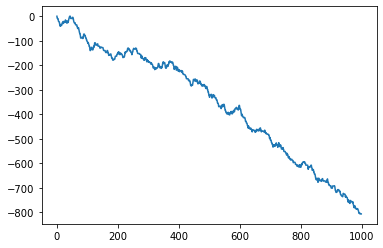

In [11]:
plt.plot(data['Aim'])